# **ENVIRONMENTAL MONITORING USING DATA VISUALIZATION**


1706606112093.png

# **Business Problem:**
Leveraging data driven insights has become imperative in a world dominated by environmental challenges and an increasing need for sustainable solutions.As a Data Scientist for the United Nations Environment Programme(UNEP), I intend to conduct a comprehensive analysis of the global weather data, using data Visualization techniques, to gain valuable insights into the environmental conditions around the globe. This analysis will assist UNEP to make informed decisions and sustainable development efforts.The dataset used for the analysis is taken from kaggle and the link to the dataset is given below:

https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository





# **1. Importing Libraries**
The libraries required for the data visualization is imported as below:



In [2]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_notebook,show
from bokeh.models import ColumnDataSource, HoverTool, DatetimeTickFormatter
import ipywidgets as widgets
from ipywidgets import interact

# **2. Data Collection and Pre-Processing**

The dataset is loaded using the pd.read_csv function. The first 5 rows of the dataset is displayed using the head() function.

In [3]:
df0 = pd.read_csv("/content/GlobalWeatherRepository.csv")
df0.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1693301400  2023-08-29 14:00                 28.8   
1          1693301400  2023-08-29 11:30                 27.0   
2          1693301400  2023-08-29 10:30                 28.0   
3          1693301400  2023-08-29 11:30                 10.2   
4          1693301400  2023-08-29 10:30                 25.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    83.8          Sunny  ...                7.9   
1                    80.6  Partly cloudy  ...               28.2   
2                    82.4  Partly cloudy  ...                6.4   
3                    50.4          Sunny  ...                0.5   
4                    77.0  Partly cloudy  ...              139.6   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              11.1                         1                          1   
1              29.6                         2                          3   
2               7.9                         1                          1   
3               0.8                         1                          1   
4             203.3                         4                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  05:24 AM  06:24 PM  05:39 PM  02:48 AM  Waxing Gibbous                 93  
1  06:04 AM  07:19 PM  06:50 PM  03:25 AM  Waxing Gibbous                 93  
2  06:16 AM  07:21 PM  06:46 PM  03:50 AM  Waxing Gibbous                 93  
3  07:16 AM  08:34 PM  08:08 PM  04:38 AM  Waxing Gibbous                 93  
4  06:11 AM  06:06 PM  04:43 PM  04:41 AM  Waxing Gibbous                 93  

[5 rows x 41 columns]

***To obtain a comprehensive understanding of the dataset df.info() method is utilized which provides information like data types,non-null count and memory usage.***

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39956 entries, 0 to 39955
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       39956 non-null  object 
 1   location_name                 39956 non-null  object 
 2   latitude                      39956 non-null  float64
 3   longitude                     39956 non-null  float64
 4   timezone                      39956 non-null  object 
 5   last_updated_epoch            39956 non-null  int64  
 6   last_updated                  39956 non-null  object 
 7   temperature_celsius           39956 non-null  float64
 8   temperature_fahrenheit        39956 non-null  float64
 9   condition_text                39956 non-null  object 
 10  wind_mph                      39956 non-null  float64
 11  wind_kph                      39956 non-null  float64
 12  wind_degree                   39956 non-null  int64  
 13  w

***The dataset contains columns that are irrelevant for the analysis hence such columns are discarded as shown in the code snippet below***

In [5]:
df0.drop(["last_updated_epoch","feels_like_celsius","feels_like_fahrenheit","timezone" ], axis = 1, inplace = True )

***The last_updated column is converted from a string format to a datetime format. A new column "date" is created by extracting the date component from the last_updated column. Finally the last_updated column is dropped***

In [6]:
df0["last_updated"] = df0["last_updated"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M"))
df0["date"] = df0["last_updated"].apply(lambda x: x.date())
df0.drop("last_updated", axis = 1, inplace = True)

***Another dataset is loaded which has countries and their respective capitals and continents. This is done to organize the data into different regions.***

In [7]:
df1 = pd.read_csv("/content/countries-continents-capitals.csv", encoding = "latin1")
df1.head()

Country/Territory           Capital Continent
0       Afghanistan             Kabul      Asia
1           Albania            Tirana    Europe
2           Algeria           Algiers    Africa
3    American Samoa         Pago Pago   Oceania
4           Andorra  Andorra la Vella    Europe

In [8]:
df1= df1.rename(columns= {"Country/Territory" : "country"})

***The two dataframes are merged on basis of the "country" to categorize them into their respective continents.***

In [9]:
df = pd.merge(df0,df1, on = "country")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38138 entries, 0 to 38137
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       38138 non-null  object 
 1   location_name                 38138 non-null  object 
 2   latitude                      38138 non-null  float64
 3   longitude                     38138 non-null  float64
 4   temperature_celsius           38138 non-null  float64
 5   temperature_fahrenheit        38138 non-null  float64
 6   condition_text                38138 non-null  object 
 7   wind_mph                      38138 non-null  float64
 8   wind_kph                      38138 non-null  float64
 9   wind_degree                   38138 non-null  int64  
 10  wind_direction                38138 non-null  object 
 11  pressure_mb                   38138 non-null  float64
 12  pressure_in                   38138 non-null  float64
 13  p

# **Data Visualization**
*The data visualization technique is employed to address the key aspects such as air quality, temperature trends, and other relevant factors. Following are the Visualizations I would like to explore:*

## **Visualization 1: What are the top 10 countries that have the worst Air quality in the world?**


In [10]:

country_air_quality_index = df.groupby("country")["air_quality_gb-defra-index"].mean()
top_10_countries = country_air_quality_index.sort_values(ascending = False).head(10)
top_10_countries = top_10_countries.iloc[::-1]


In [11]:
fig = px.bar(top_10_countries,orientation ="h", title  = "<b><i>Asian Nations ranks the highest in air pollution, with India topping the list</i></b>",
             color = top_10_countries.values,
             text= top_10_countries.values.round(2),
             color_continuous_scale= "Blues")
fig.update_layout(xaxis = dict(showticklabels = False),yaxis_title = "",xaxis_title = "" ,plot_bgcolor = "white", title_x = 0.5)
fig.show()

*Inference: To reduce air pollution UNEP could colloborate with local government to enforce stricter regulations on emissions and encourage cleaner energy solutions.*



## **Visualization 2: Which Countries Experience the most temperature rise?**

In [12]:
temperature_rise = df.groupby("country")["temperature_celsius"].agg(lambda x: max(x) -min(x)).reset_index()
top_5_temp_rise_countries = temperature_rise .sort_values(by = "temperature_celsius", ascending = False).head(5)
fig1 = px.bar(top_5_temp_rise_countries, x = "country",
              y = "temperature_celsius",
              title =  "<b>Russia stands out as the country with the highest temperature rise, with an increase of 78.4°celsius</b>",
              text= top_5_temp_rise_countries["temperature_celsius"].round(1),
              color = "temperature_celsius",
              color_continuous_scale= "Reds")
fig1.update_layout(yaxis = dict(showticklabels = False),xaxis_title = "",yaxis_title = "", plot_bgcolor = "white", title_x = 0.5)
fig1.update_traces(texttemplate = "%{text}°C")
fig1.show()

*Inference: Russia's substantial temperature rise indicates severe climate changes that demands urgent attention.*

## **Visualization 3 : What are the correlations between various weather variables?**

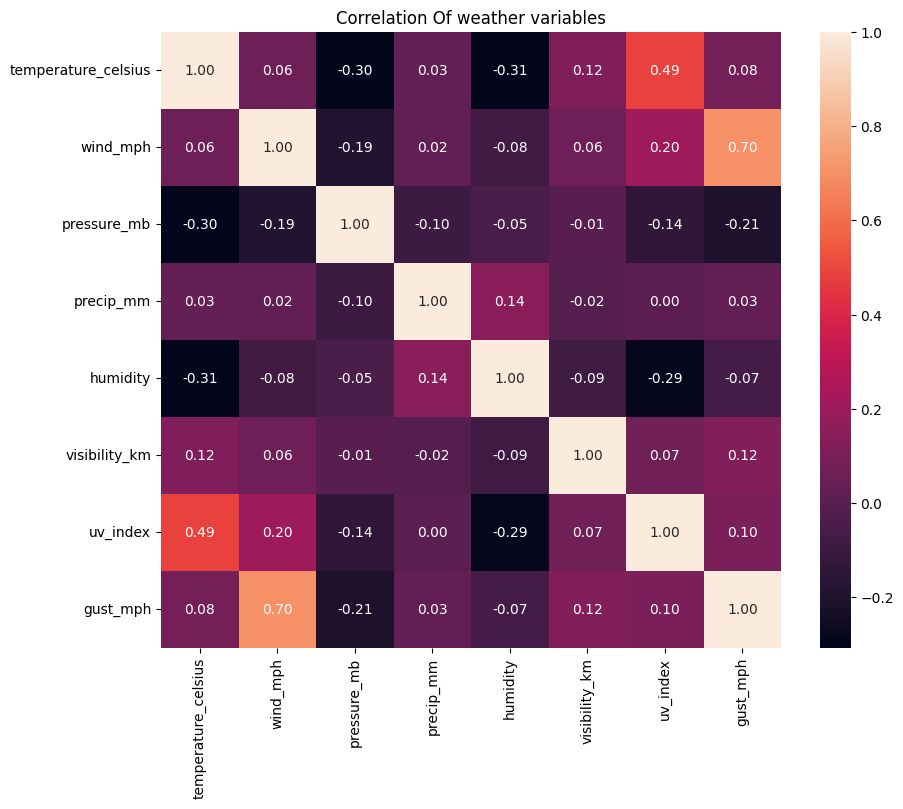

In [13]:
weather_variables  = df[["temperature_celsius","wind_mph", "pressure_mb", "precip_mm", "humidity","visibility_km","uv_index","gust_mph"]]
plt.figure(figsize =(10,8))
sns.heatmap(weather_variables.corr(), annot = True, fmt= ".2f")
plt.title("Correlation Of weather variables")
plt.show()

*Inference: The correlation coefficient of 70% between wind speed and gust speed indicates that higher wind speeds corresponds to stronger gust which can lead to storm or hurricane.*

## **Visualization 4: How does average wind speed vary across different continents?**

In [14]:
avg_wind_speed = df.groupby("Continent")["wind_mph"].mean().reset_index()

fig = px.scatter(avg_wind_speed, x = "Continent", y ="wind_mph", size = "wind_mph",
                  title = "<b> North America exhibits the highest average wind speed compared to other continents </b>",hover_name = "Continent", hover_data ={"wind_mph": True},
                  size_max = 90, text =avg_wind_speed["Continent"], color ="wind_mph", color_continuous_scale="Cividis" )

fig.update_layout(xaxis = dict(showticklabels = False),xaxis_title = "",yaxis_title = "Avg Wind Speed(mph)", plot_bgcolor ="white",title_x = 0.5)
fig.show()

*Inference: Continents with higher average wind speed present opportunities for wind energy generation, reducing reliance on non renewable energy.*

## **Visualization 5: How does UV index vary across different cities?**

In [26]:
def plot_uv_index(location):
  df_loc = df[df["location_name"]== location]
  source = ColumnDataSource(df_loc)
  p = figure(title = f"Variation of UV index over time for {location}",
             x_axis_label= "Date",
             y_axis_label= "UV Index",
             x_axis_type= "datetime")
  p.line(x = "date", y = "uv_index", source = source, line_width = 2)
  output_notebook()
  show(p)
location_list = df["location_name"].unique().tolist()
interact(plot_uv_index, location = widgets.Dropdown(options = location_list, description = "Location:"))

interactive(children=(Dropdown(description='Location:', options=('Kabul', 'Tirana', 'Algiers', 'Andorra La Vel…

<function __main__.plot_uv_index(location)>

*Inference: The code snippet given above is an interactive visualization that allows us to explore the variation of UV index for different locations over time.*

## **Visualization 6: What is the sunrise and sunset timing in different cities?**

In [28]:
df["sunrise"] = pd.to_datetime(df["sunrise"])
df["sunset"] = pd.to_datetime(df["sunset"])

df["sunrise_ms"] = df["sunrise"].astype(int)/10**6
df["sunset_ms"] = df["sunset"].astype(int)/10**6

location_list =  sorted(df["location_name"].unique())
def plot(location):
    df_loc = df[df["location_name"]== location]
    p = figure(title = f"Sunrise and Sunset Times for {location}",
             x_axis_label= "Date",
             y_axis_label= "Time",
             x_axis_type= "datetime")
    p.line(x = "date", y = "sunrise_ms", source = ColumnDataSource(df_loc), line_width = 2,legend_label = "Sunrise", color = "orange")
    p.line(x = "date", y = "sunset_ms", source = ColumnDataSource(df_loc), line_width = 2,legend_label = "Sunset", color = "blue")
    hover = HoverTool(tooltips = [("Date", "@date{%F}"), ("Sunrise","@sunrise{%T}"),("Sunset","@sunset{%T}")],formatters = {"@date":"datetime", "@sunrise": "datetime","@sunset":"datetime"}, mode = "vline")
    p.add_tools(hover)
    p.yaxis.formatter = DatetimeTickFormatter(seconds = "%H:%M")
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"
    show(p,notebook_handle = True)
output_notebook()
interact(plot, location = widgets.Dropdown(options = location_list, description = "Location:"))

interactive(children=(Dropdown(description='Location:', options=("'S Gravenjansdijk", "'S Gravenjansdyk", "'S …

<function __main__.plot(location)>

*Inference: Sunrise and sunset timings provides useful information about the daylight duration impacting various activities like agriculture, energy usage patterns and outdoor leisure.*

## **Visualization 7: How does Humidity vary across different continents?**

In [17]:
fig = px.box(df, x = "Continent",
             y = "humidity",
             title = "Variation of humidity across Continents",
             labels = {"humidity" : "Humidity", "Continent":"Continent"})
fig.update_layout(xaxis_title= "",yaxis_title= "Humidity", xaxis = {"categoryorder":"total ascending"})
fig.show()

*Inference: Africa has the lowest humidity indicating arid climate which can lead to water scarcity.*

## **Visualization 8: How does wind speed, pressure and temperature interact with each other?**

In [18]:
fig = px.scatter_3d(df, x = "wind_mph", y = "pressure_mb", z = "temperature_celsius",
                    color = "Continent",opacity = 0.7,
                    title = "3D Scatter Plot",
                    labels = {"wind_mph":"Wind(mph)","pressure_mb":"Pressure(mb)","temperature_celsius":"Temperature(celsius)"  })

fig.show()

*Inference: The 3D-scatter plot provides insights into the weather pattern and atmospheric conditions. Clusters of data points with low pressure and higher wind speeds indicate stormy weather(Eg: Africa).*

## **Visualization 9: How does weather conditions vary across different continents?**

In [19]:
condition_text_count = 3
continent_condition = df.groupby(["Continent", "condition_text"]).size().reset_index(name = "count")
condition_text_per_continent = continent_condition.groupby("Continent").apply(lambda x: x.nlargest(condition_text_count,"count")).reset_index(drop = True)
fig = px.sunburst(condition_text_per_continent,
                  path =["Continent","condition_text" ],
                  values = "count",
                  width = 1200, height = 900,
                  color = "Continent")
fig.show()

*Inference : The sunburst chart helps us to visualize weather conditions in different continents.Larger segments indicates higher occurence of certain weather conditions. In most of the continents larger segment is partly cloudy indicating the prevalence of cloudy weather in the continents.*

## **Visualization 10: How does gust speed vary across different continents?**

In [20]:
dat = df[["gust_mph", "Continent"]]
fig = px.violin(dat, x = "Continent", y = "gust_mph",
                box = True, points = "all",
                hover_data = dat.columns,
                title = "Gust Speed distribution across Continents")
fig.update_layout(xaxis_title=" ", yaxis_title = "Gust Speed(mph)", showlegend = False,plot_bgcolor = "white")
fig.show()

*Inference: Continents with higher variation of gust speed like South America & Asia are vulnerable to environmental impact like soil erosion,and wild fire affecting biodiversity and wildlife populations.*

# **DISCUSSION:**
The analysis of Global weather data using visualization helps us to better understand rthe global weather conditions. The key insights from the visualizations include:
1. Air Quality Concerns: High pollution levels in Asian Nations requires immediate actions for strict regulations and clean energy initiatives.
2. Climate Change impact: Rising temperature, alongside low humidity and extreme weather conditions indicates climate change, demanding effective mitigation strategies for communities and ecosystem.
3. Sustainability of the environment: The regions that has varying gust speeds are susceptible to environmental vulnerabilities like soil erosion and wildfire, emphasizing the need for conservation of biodiversity and wildlife.
4. Informed Decision making: These insights can help policy makers to make informed decisions, driving effective environmental conservation initiatives.

# **CONCLUSION**
In this analysis we have leveraged the power of data visualization techniques to gain valuable insights about weather patterns and conditions. These Visualizations help UNEP to prioritize resources effectively and identify regions requiring immediate environmental action, informing climate resilience strategies and fostering opportunities for sustainable development like renewable energy, facilitating the transition to a greener economy. The data driven insights empower UNEP to make informed decisions and propel the transition towards a sustainable future, addressing the most pressing climate changes.


# **REFERENCE**
1. Environment, U.N. (2021). Monitoring progress. [online] UNEP - UN Environment Programme. Available at: https://www.unep.org/explore-topics/sustainable-development-goals/what-we-do/monitoring-progress.

2. www.sciencedirect.com. (n.d.). Environmental Monitoring - an overview | ScienceDirect Topics. [online] Available at: https://www.sciencedirect.com/topics/earth-and-planetary-sciences/environmental-monitoring.

3. Harper, C. (2018). Visualizing Data with Bokeh and Pandas. Programming Historian. [online] Available at: https://programminghistorian.org/en/lessons/visualizing-with-bokeh.

‌

‌

# **ASSESSMENT FORM**

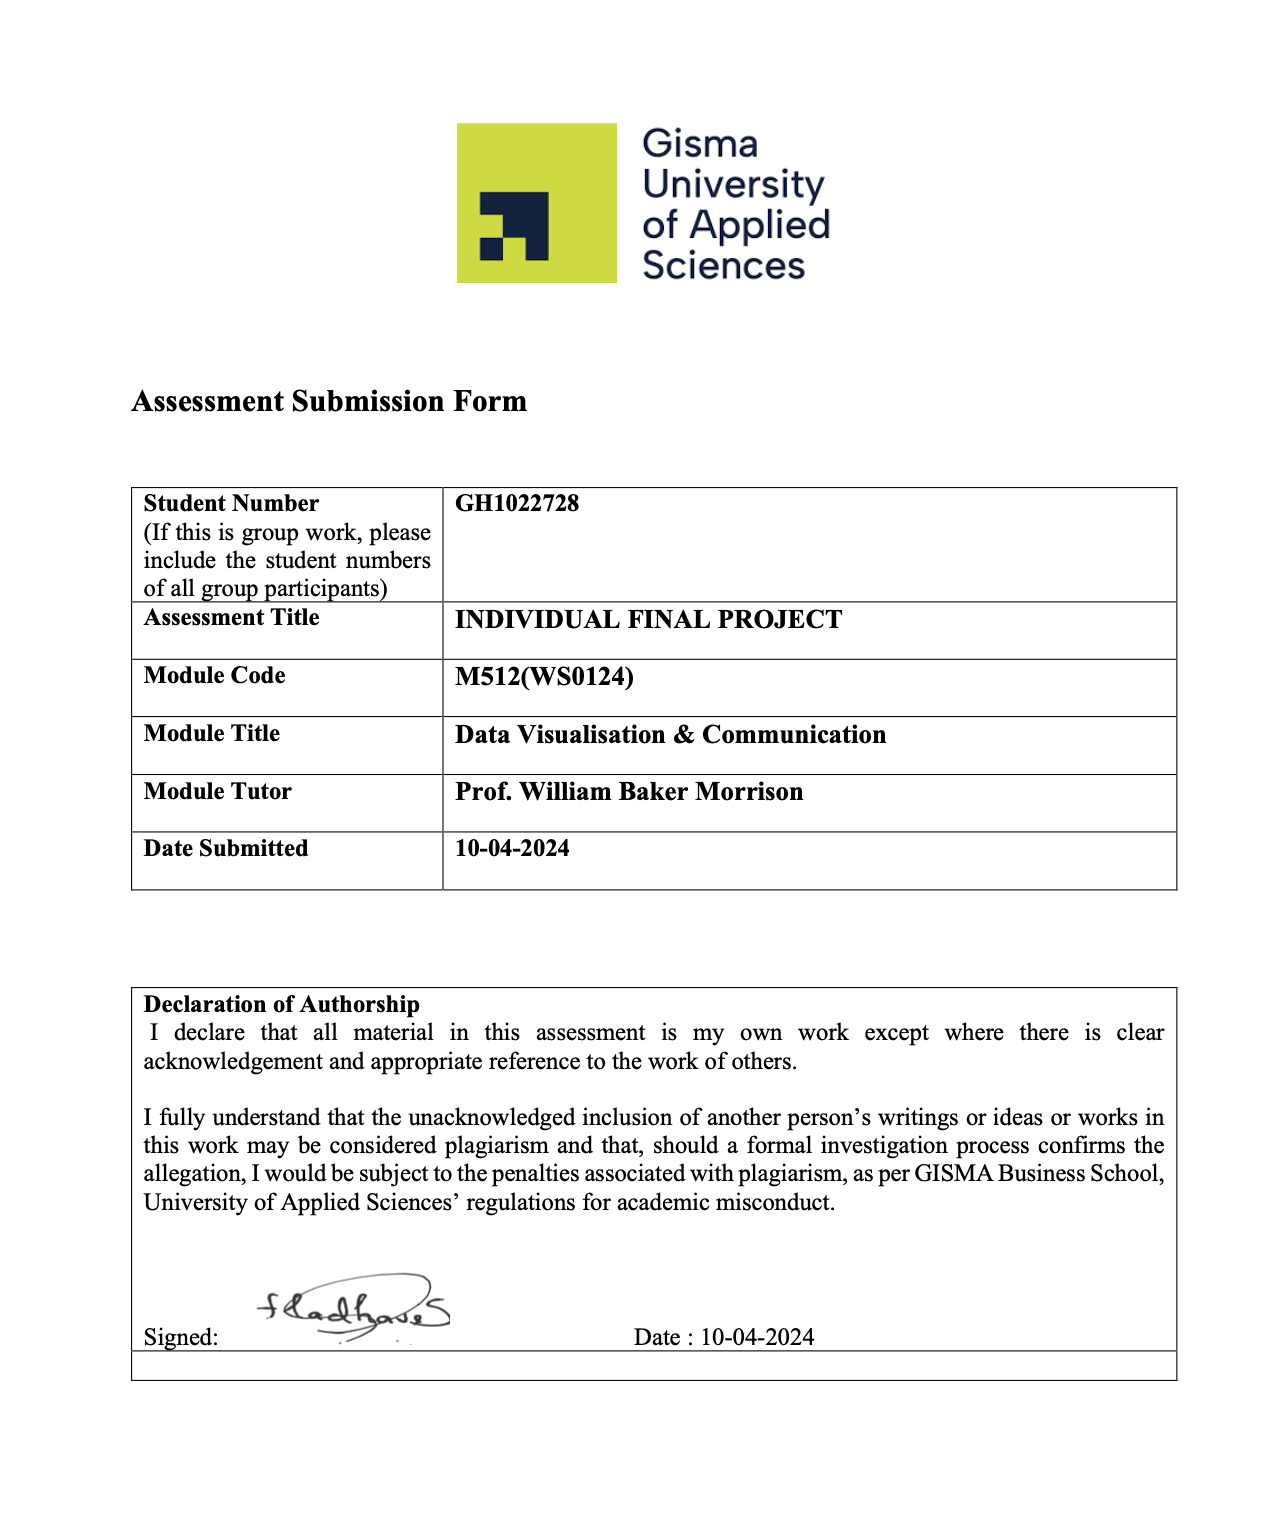

In [21]:
###!pip install nbconvert
###!jupyter--to html /Users/madhavis/Downloads/ENVIRONMENTAL_MONITORING_USING_DATA_VISUALIZATION.ipynb
